# BigML : Learning curves - deepnet vs ensemble

<font color='grey'>Imports dont on a besoin pour cet exercice :</font>

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, roc_auc_score
from bigml.api import BigML

## Chargement des ressources créées sur BigML

<font color='grey'>Charger l'id du projet BIGML :</font>

In [3]:
api= BigML (project='project/5d94a42b42129f2e6200010e')

<font color='grey'>Dans le notebook `bigml.ipynb`, nous avons créé une source à partir de ce lien ainsi que les datasets :trainfull, train80, val20. Nous allons les réutiliser ici pour créer les learning curves.</font>

In [4]:
trainfull = api.get_dataset("dataset/5dc2b889e47684746801366e")

In [5]:
train80 = api.get_dataset("dataset/5dc2b8b8e476847468013686")

In [6]:
val20 = api.get_dataset("dataset/5dc2b8b97811dd01370016b5")

In [7]:
test = api.get_dataset("dataset/5dc2b910e4768473b60008ab")

## Créer les paliers pour les courbes

<font color='grey'>Pour cela, créer des listes vides pour contenir l'abscisse (taille du dataset) et l'ordonnée (AUC) pour les modèles ensemble et deepnet :</font>

In [8]:
x_ensemble = []
y_ensemble = []
x_deepnet = []
y_deepnet = []

<font color='grey'>Ensuite créer une boucle pour les paliers (10%) du dataset train80, avec lequel on va créer les modèles ensemble et deepnet (*attention cette étape prends du temps*):</font>

In [9]:
for i in range(1,11):
    train_set = api.create_dataset(train80, {"name": "Train Set " + str(i/10), "sample_rate": i/10, "seed": "my seed"})
    api.ok(train_set)

    # ensemble
    ensemble = api.create_ensemble(train_set, {"objective_field" : "SeriousDlqin2yrs", "name": "Ensemble " + str(i/10)})
    api.ok(ensemble)

    # Evaluastion sur ensemble
    evaluation = api.create_evaluation(ensemble, val20)
    api.ok(evaluation)

    # deepnet
    deepnet = api.create_deepnet(train_set, {"objective_field" : "SeriousDlqin2yrs", "name": "Deepnet " + str(i/10)})
    api.ok(deepnet)

    # Evaluation sur deepnet
    evaluation_deepnet = api.create_evaluation(deepnet, val20)
    api.ok(evaluation_deepnet)

    x_ensemble.append(i*10)
    y_ensemble.append(evaluation['object']['result']['model']['average_area_under_roc_curve'])

    x_deepnet.append(i*10)
    y_deepnet.append(evaluation_deepnet['object']['result']['model']['average_area_under_roc_curve'])

    i += 1
    
print(x_ensemble)
print(y_ensemble)
print(x_deepnet)
print(y_deepnet)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.83277, 0.84416, 0.84964, 0.8513, 0.8532, 0.85438, 0.85592, 0.85407, 0.85535, 0.85467]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.83471, 0.83905, 0.8445, 0.83827, 0.84363, 0.84348, 0.8365, 0.84388, 0.84436, 0.84441]


## Créer le graphique 

<font color='grey'>Créer le graphique des learning curves :</font>

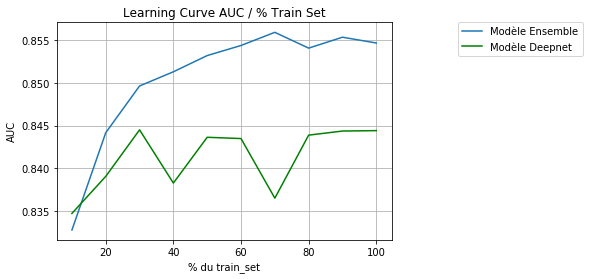

In [10]:
fig, ax = plt.subplots()
ax.plot(x_ensemble, y_ensemble, label='Modèle Ensemble')
ax.plot(x_deepnet, y_deepnet, label='Modèle Deepnet', color="g")
ax.set(xlabel='% du train_set', ylabel='AUC',  title='Learning Curve AUC / % Train Set')
plt.legend(bbox_to_anchor=(1.2, 1), loc='best', borderaxespad=0.)
ax.grid()
plt.show()